# F1 Winner Prediction 

In [66]:
# importing required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.preprocessing import LabelEncoder

# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# Importing the Data

In [2]:
result_df = pd.read_csv('results.csv')
stats_df = pd.read_csv('status.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
constructor_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
pd.get_option("display.max_columns",None)

In [3]:
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
stats_df.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [5]:
drivers_df.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
races_df.head() 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
constructor_df.head() 

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
driver_standings_df.head() 

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


# Feature Engineering

In [9]:
races_df = races_df.raceId.astype(int)

In [10]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [11]:
# checking of null values

df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_x                0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name                 0
nationality_y        0
url_y                0
status               0
dtype: int64

#### There are no null values in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

# Describe
Describe function is used to show the statistical value of each column. which all include:

* Count of the column
* Mean value of the column
* Standard Deviation of the column
* Minimum value of the column
* 25% percentile of the column
* 50% percentile of the column
* 75% percentile of the column
* Maximum value of the column

In [13]:
# summary
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,12630.091396,8209.508032,1.0,5125.0,11763.0,21140.0,26085.0
raceId_x,3537627.0,517.066570,331.536193,1.0,234.0,467.0,856.0,1110.0
driverId,3537627.0,204.182795,265.852299,1.0,20.0,105.0,229.0,858.0
constructorId,3537627.0,39.412151,56.860468,1.0,6.0,16.0,37.0,214.0
grid,3537627.0,9.763203,6.557031,0.0,4.0,9.0,15.0,34.0
positionOrder,3537627.0,11.229562,7.378775,1.0,5.0,10.0,17.0,39.0
points_x,3537627.0,2.998598,5.334331,0.0,0.0,0.0,4.0,50.0
laps,3537627.0,48.362040,25.123229,0.0,32.0,55.0,67.0,200.0
statusId,3537627.0,13.238133,22.544512,1.0,1.0,5.0,12.0,141.0
driverStandingsId,3537627.0,40117.463301,25309.272186,1.0,13856.0,49960.0,65824.0,72187.0


In [14]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [15]:
# droping unwanted columns 

columns_to_drop = ['url_y', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 'time', 'driverRef',
                   'constructorRef', 'nationality_y', 'positionText_y', 'raceId_y', 'points_y']

df = df.drop(columns=columns_to_drop)

In [16]:
# changing of old column name to meaningful name 

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


![overtake](https://c.tenor.com/IB4EgSxeYREAAAAd/f1-max-verstappen.gif)

In [17]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [18]:
df = df.drop(['forename'],axis=1)
df = df.drop(['surname'],axis=1)

# Converting dtype

Changing of data type from object to date to calculate the driver's age.

In [19]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton


In [20]:
# converting to date format from string 

pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3537622   1913-05-05
3537623   1913-05-05
3537624   1913-05-05
3537625   1913-05-05
3537626   1913-05-05
Name: dob, Length: 3537627, dtype: datetime64[ns]

In [21]:
df['dob'] = pd.to_datetime(df['dob'])

In [23]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [24]:
df['age'] = round(age)

In [25]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [26]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [27]:
df.drop('driver_num',axis=1,inplace=True)

In [28]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [29]:
df[cat].head()

,driver_code,nationality,name,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [30]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,39.0


In [31]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionOrder                     int64
points                          float64
laps                              int64
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
max_speed                       float64
statusId                          int64
driver_code                      object
dob                      datetime64[ns]
nationality                      object
driverStandingsId                 int64
position                          int64
wins                              int64
name                             object
status                           object
driver_name                      object
age                             float64
dtype: object

In [32]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [33]:
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004523
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.421936
fastestLap               60.511100
rank                     59.513764
max_speed                60.511100
statusId                  0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
name                      0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [34]:
df['max_speed'].mean()

204.02159408791888

In [35]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [36]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
name                     0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [37]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,1.263009e+04,8209.508032,1.00,5.125000e+03,1.176300e+04,2.114000e+04,26085.00
racerId,3537627.0,5.170666e+02,331.536193,1.00,2.340000e+02,4.670000e+02,8.560000e+02,1110.00
driverId,3537627.0,2.041828e+02,265.852299,1.00,2.000000e+01,1.050000e+02,2.290000e+02,858.00
constructorId,3537627.0,3.941215e+01,56.860468,1.00,6.000000e+00,1.600000e+01,3.700000e+01,214.00
number,3537627.0,1.541915e+01,13.997266,0.00,6.000000e+00,1.200000e+01,2.100000e+01,208.00
grid,3537627.0,9.763203e+00,6.557031,0.00,4.000000e+00,9.000000e+00,1.500000e+01,34.00
positionOrder,3537627.0,1.122956e+01,7.378775,1.00,5.000000e+00,1.000000e+01,1.700000e+01,39.00
points,3537627.0,2.998598e+00,5.334331,0.00,0.000000e+00,0.000000e+00,4.000000e+00,50.00
laps,3537627.0,4.836204e+01,25.123229,0.00,3.200000e+01,5.500000e+01,6.700000e+01,200.00
timetaken_in_millisec,3537627.0,5.955319e+06,760797.157790,207071.00,5.955319e+06,5.955319e+06,5.955319e+06,15090540.00


# Map

The map is used to plot the track that are used all around the world using latitude and longitude.

In [39]:
circuit_df = pd.read_csv('circuits.csv')
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


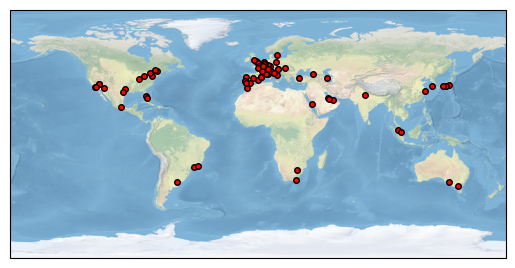

In [43]:
# Assuming circuit_df has 'lat' and 'lng' columns
coordinates = circuit_df[['lat', 'lng']].values

# Create a Cartopy map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()

# Plot each point on the map with a smaller, different marker
ax.plot(coordinates[:, 1], coordinates[:, 0], 'o', markersize=4, color='red', markeredgewidth=1, markeredgecolor='black')

plt.show()

In [44]:
df['rank'].unique()

array([ 2.,  3.,  6.,  5.,  4., 11.,  1., 12., 15., 10.,  9.,  8.,  7.,
       18., 19., 13., 17.,  0., 14., 16., 20., 21., 22., 23., 24.])

# Data Filtration

Filtering data by the driver who finished the race successfully

In [45]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
1363657,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72083,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363658,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72123,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363659,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72143,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363660,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72163,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363661,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,72184,10,0,Manor Marussia,Finished,Esteban Ocon,27.0


In [46]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [47]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72079,19,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363489,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72119,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363490,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72139,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363491,26042,1108,856,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,1,DEV,1995-02-06,Dutch,72159,20,0,AlphaTauri,Finished,Nyck de Vries,29.0


In [48]:
# filtering the data by mean of driver's age

df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [49]:
# droping unwanted columns

df.drop('dob',axis=1,inplace=True)
df.drop('statusId',axis=1,inplace=True)

In [50]:
num.remove('dob')
num.remove('statusId')

In [51]:
df.shape

(572826, 22)

Still some columns are skewed even after outlier removal and skewness can be normalized during ML part.

# Encoding

I have choosen LabelEncoding instead of one hot encoding, because one hot will give you a various new columns based on the unique value. I will recommend LabelEncoding to use always, since it will replace in a single column for new value.

Note:
    
    * To represent a unicode string as a string of bytes is known as encoding.
    * To convert a string of bytes to a unicode string is known as decoding.

In [54]:
le = LabelEncoder()

In [55]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driver_code,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,25,6,1,1,1,20,0,46,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,25,6,9,1,1,20,0,46,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,25,6,27,3,1,20,0,46,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,25,6,48,2,1,20,0,46,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,25,6,69,3,1,20,0,46,39.0


In [56]:
x = df.drop('driver_name',axis=1)
y = df.driver_name

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# ML Algorithms

In [59]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [60]:
tree.export_text(clf)

'|--- feature_2 <= 1.50\n|   |--- class: 46\n|--- feature_2 >  1.50\n|   |--- feature_13 <= 3.50\n|   |   |--- feature_2 <= 78.50\n|   |   |   |--- class: 21\n|   |   |--- feature_2 >  78.50\n|   |   |   |--- feature_14 <= 24.50\n|   |   |   |   |--- feature_0 <= 23033.50\n|   |   |   |   |   |--- class: 30\n|   |   |   |   |--- feature_0 >  23033.50\n|   |   |   |   |   |--- class: 28\n|   |   |   |--- feature_14 >  24.50\n|   |   |   |   |--- class: 1\n|   |--- feature_13 >  3.50\n|   |   |--- feature_2 <= 8.50\n|   |   |   |--- feature_2 <= 7.50\n|   |   |   |   |--- feature_13 <= 49.50\n|   |   |   |   |   |--- class: 57\n|   |   |   |   |--- feature_13 >  49.50\n|   |   |   |   |   |--- class: 59\n|   |   |   |--- feature_2 >  7.50\n|   |   |   |   |--- class: 43\n|   |   |--- feature_2 >  8.50\n|   |   |   |--- feature_13 <= 5.50\n|   |   |   |   |--- feature_20 <= 52.50\n|   |   |   |   |   |--- class: 74\n|   |   |   |   |--- feature_20 >  52.50\n|   |   |   |   |   |--- class:

In [61]:
fn = list(df.columns)
fn.remove('driver_name')

# DT workflow

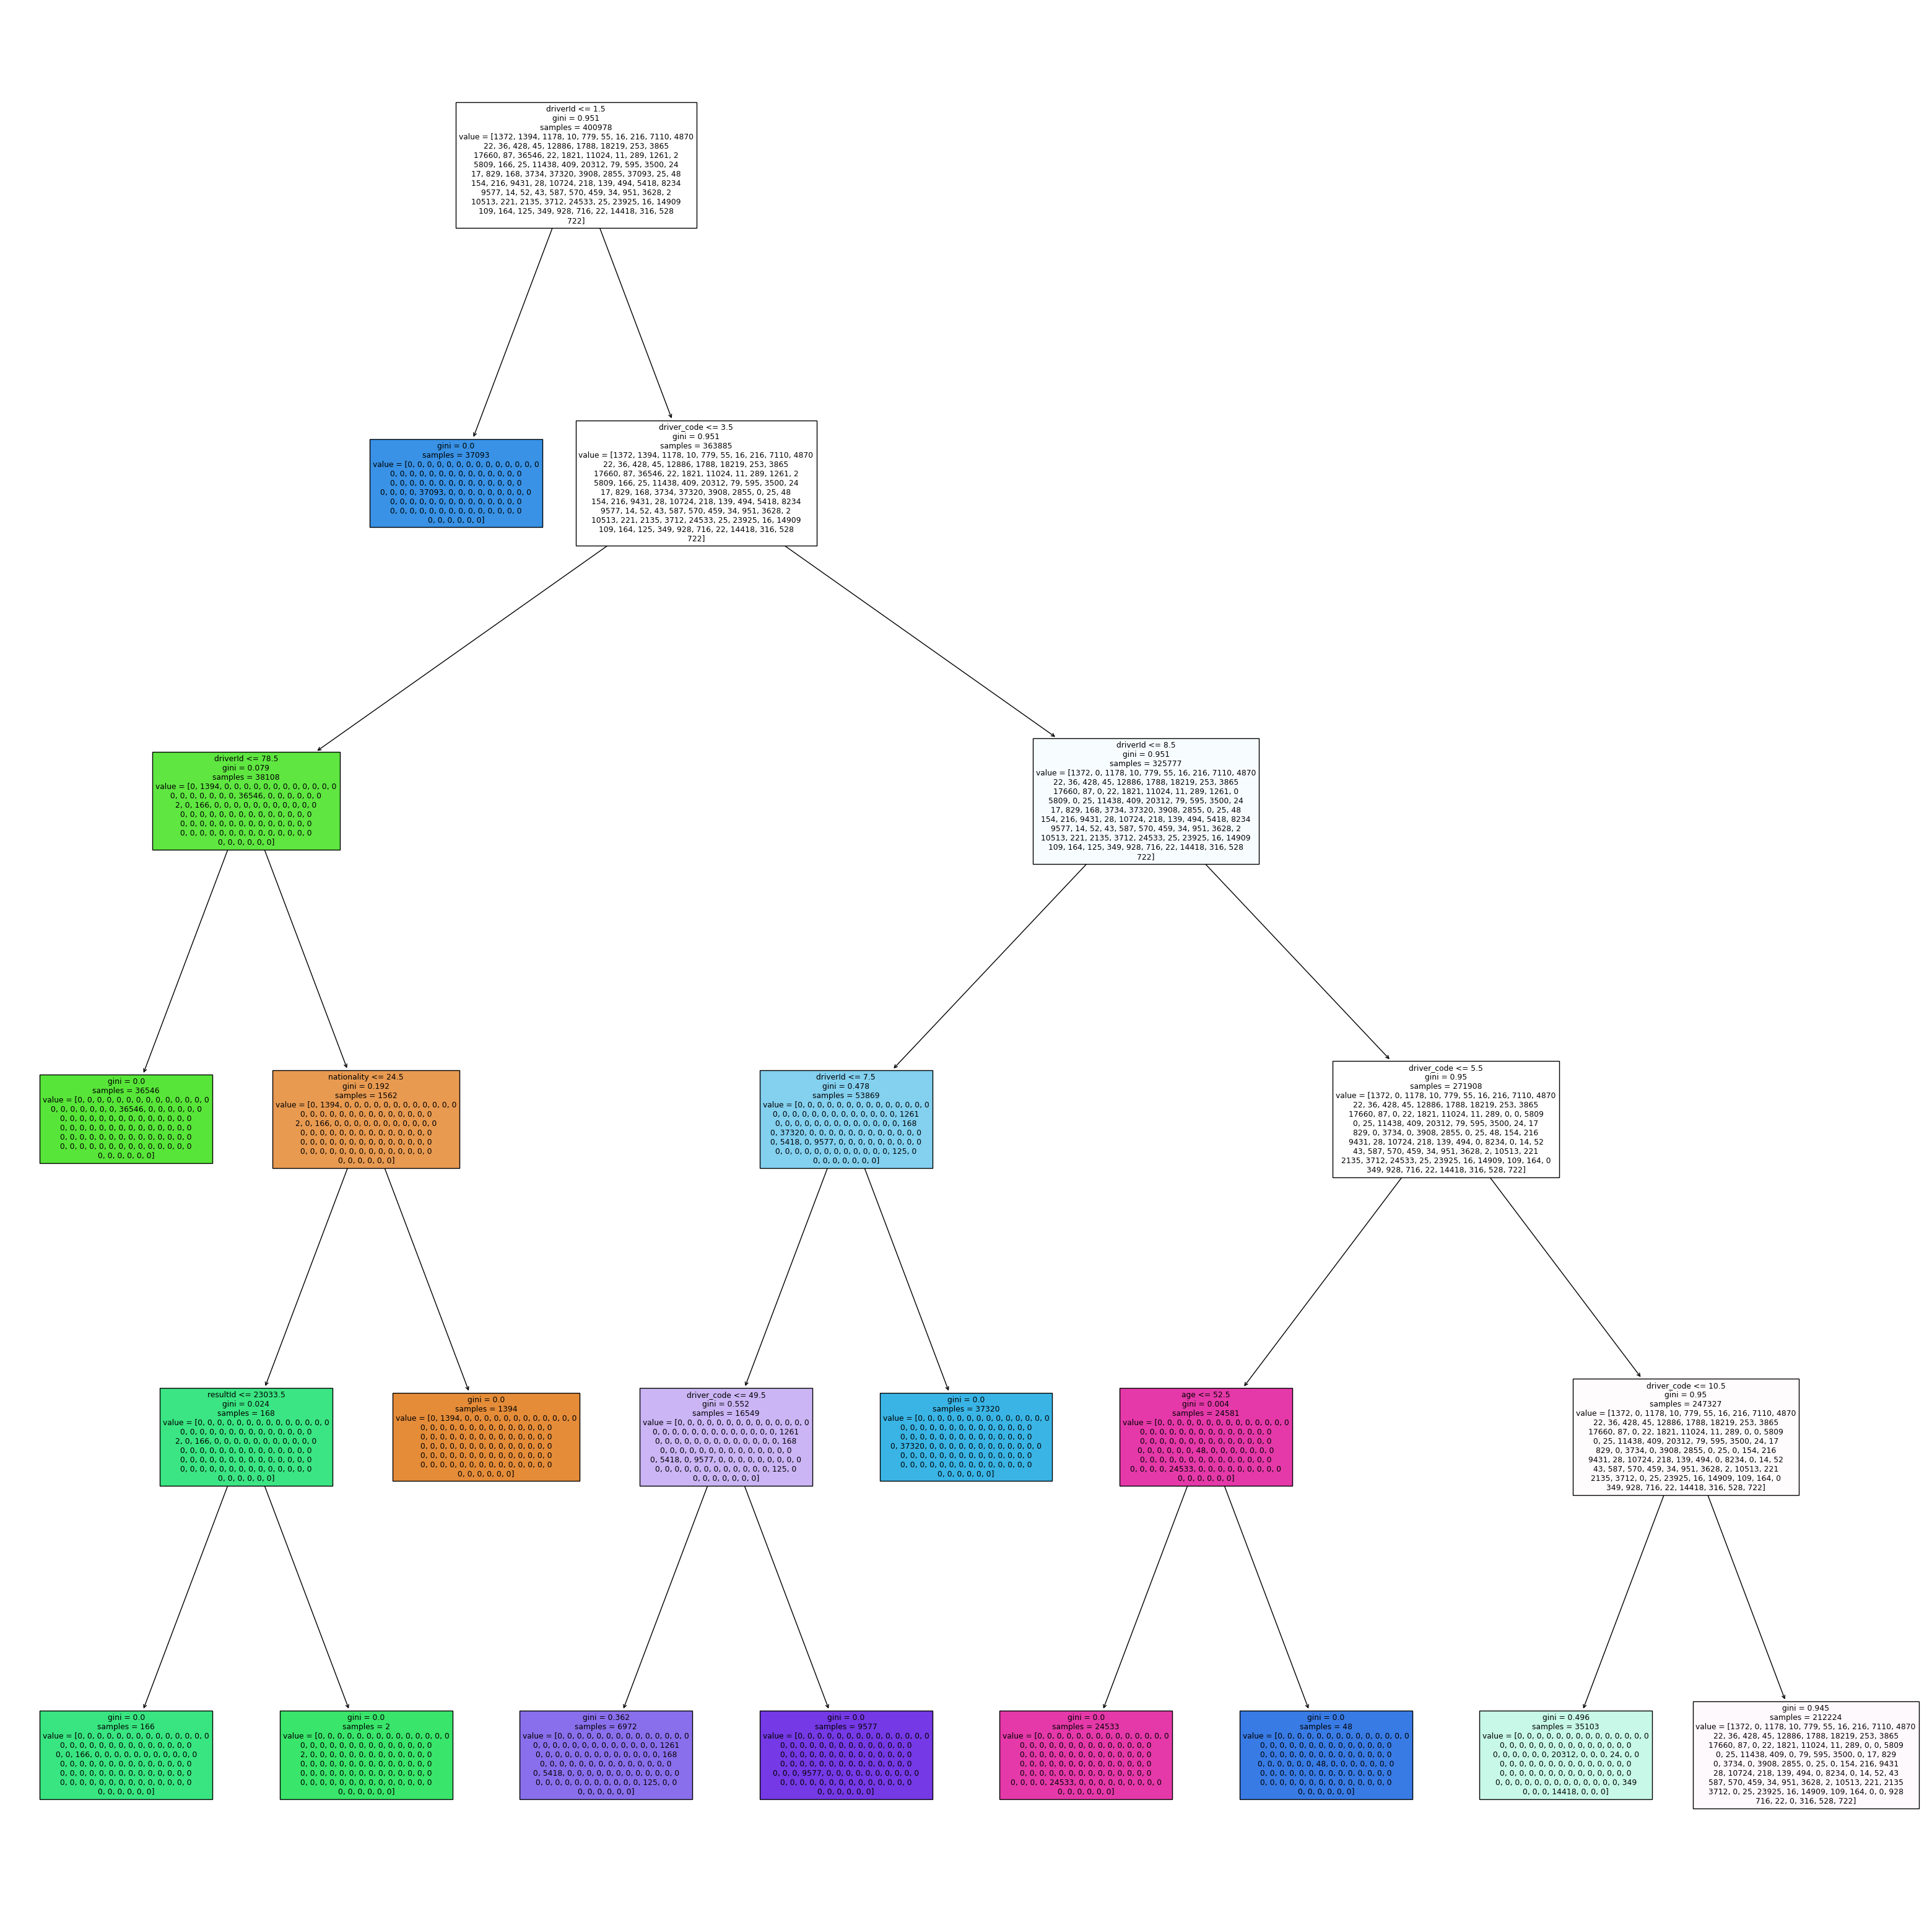

In [62]:
# plotting decision tree workflow 

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

# Modeling the data

In [ ]:
# classification ML algorithms 

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()

In [ ]:
li = [lr,knn,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

In [ ]:
xgb_model = XGBClassifier(objective='multi:softmax', 
                          num_class=len(set(ytrain)), 
                          max_depth=3, learning_rate=0.1)

# Train the XGBoost model
xgb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_predxg = xgb_model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_predxg)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# Calculate precision and recall
precision = precision_score(ytest, y_predxg, average='weighted')
recall = recall_score(ytest, y_predxg, average='weighted')

# Print the precision and recall
print("Precision:", precision)
print("Recall:", recall)

In [ ]:

# Create an XGBClassifier object
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(set(ytrain)))

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

# Train the XGBoost model with hyperparameter tuning
grid_search.fit(xtrain, ytrain)

# Get the results
results = grid_search.cv_results_
depth_values = param_grid['max_depth']
learning_rate_values = param_grid['learning_rate']

print("Number of combinations:", len(results['mean_test_score']))
print("Expected size for reshaping:", len(depth_values) * len(learning_rate_values))

# Reshape the results for plotting
accuracy_matrix = np.array(results['mean_test_score']).reshape(len(depth_values), len(learning_rate_values))

# Plotting the results
plt.figure(figsize=(8, 6))
for i, depth in enumerate(depth_values):
    plt.plot(learning_rate_values, accuracy_matrix[i, :], label=f'Max Depth={depth}')

plt.title('Accuracy for Different Max Depths and Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Accuracy')
plt.legend()
plt.show()

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_predxg = grid_search.predict(xtest)


In [ ]:
x.columns

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
for x,y in zip(d.keys(),d.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [ ]:
li = [knn]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(di.keys(),di.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [ ]:
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [ ]:
li = [lr,rn,knn,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dic.keys(),dic.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) 

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [ ]:
# fit scaler on train data
scaler = RobustScaler().fit(xtrain)
# transform train data
xtrain_scaled = scaler.transform(xtrain)
# transform test data
xtest_scaled = scaler.transform(xtest)

In [ ]:
li = [lr,rn,knn,dt]
dics = {}
for i in li:
    i.fit(xtrain_scaled,ytrain)
    ypred = i.predict(xtest_scaled)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dics.update({str(i):i.score(xtest_scaled,ytest)*100})

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dics.keys(),dics.values(),marker='o',color='darkseagreen',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dics.keys(),dics.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# Thank you!